# The Array-Backed List

## Agenda

1. The List **Abstract Data Type** (ADT)
2. A List **Data Structure**
3. The List API
4. Getting started
5. NumPy arrays
6. The `ArrayList` data structure
7. Runtime analysis

## 1. The List **Abstract Data Type** (ADT)

An **abstract data type (ADT)** defines a *conceptual model* for how data may be stored and accessed.

I.e., they are an *idea*. They do not tell anything about direct performance.

A **list ADT** is a data container where:

- values are ordered in a *sequence*
- each value has at most one preceding and one succeeding value
- a given value may appear more than once in a list

Other common ADTs (some of which we'll explore later) include:

- Stacks
- Queues
- Priority Queues
- Maps
- Graphs

## 2. A List **Data Structure**

A **list data structure** is a *concrete implementation* of the list ADT in some programming language, which, in addition to adhering to the basic premises of the ADT, will also typically support operations that:

- access values in the list by their position (index)
- append and insert new values into the list
- remove values from the list

The implementation of any data structure will generally rely on simpler, constituent data types (e.g., "primitive" types offered by the language), the choice of which may affect the runtime complexities of said operations.

## 3. The List API

The operations we'll be building into our list data structures will be based on the [common](https://docs.python.org/3.6/library/stdtypes.html#common-sequence-operations) and [mutable](https://docs.python.org/3.6/library/stdtypes.html#mutable-sequence-types) sequence operations defined by the Python library.

In [ ]:
class List:        
    ### subscript-based access ###
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        pass

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        pass

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        pass
    
    ### stringification ###
            
    def __repr__(self):
        """Supports inspection"""
        return '[]'
    
    def __str__(self):
        """Implements `str(self)`"""
        return '[]'

    ### single-element manipulation ###
    
    def append(self, value):
        pass
    
    def insert(self, idx, value):
        pass
    
    def pop(self, idx=-1):
        pass
    
    def remove(self, value):
        pass
    
    ### predicates (T/F queries) ###
    
    def __eq__(self, other):
        """Implements `self == other`"""
        return True

    def __contains__(self, value):
        """Implements `val in self`"""
        return True
    
    ### queries ###
    
    def __len__(self):
        """Implements `len(self)`"""
        return len(self.data)
    
    def min(self):
        pass
    
    def max(self):
        pass
    
    def index(self, value, i, j):
        pass
    
    def count(self, value):
        pass

    ### bulk operations ###

    def __add__(self, other):
        """Implements `self + other_array_list`"""
        return self
    
    def clear(self):
        pass
    
    def copy(self):
        pass

    def extend(self, other):
        pass

    ### iteration ###
    
    def __iter__(self):
        """Supports iteration (via `iter(self)`)"""
        pass

## 4. Getting started

Implementing Python's syntax requires implementing the special methods.

In [1]:
class List:
    def append(self, value):
        self.val = value
    
    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        return self.val

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        self.val = value
    
    def __repr__(self):
        """Supports inspection"""
        return f"[{repr(self.val)}]"

In [2]:
l = List()
l.append(42)

In [3]:
l # equivalent to l.__repr__()

[42]

In [4]:
l[0] # equivalent to l.__getitem__(0)

42

In [5]:
l[0] = 331 # equivalent to l.__setitem__(0, 331)

In [6]:
l[500]

331

In [7]:
l

[331]

Of course, we need our list implementation to hold more than a single element. The obvious solution for this is to use an *array*.

## 5. NumPy arrays

Python does not come with a built-in array type. Instead, we're going to make use of the array implementation provided by the [NumPy scientific computing package](https://numpy.org/doc/stable/user/absolute_beginners.html).

To create a NumPy array of size N, we can do:

In [8]:
import numpy as np

N = 10
arr = np.empty(N, dtype=object)

The `dtype=object` specification indicates that we want to use the array to store references to arbitrary Python objects. The `empty` function creates an array of the specified size, but leaves all elements uninitialized.

In [9]:
for i in range(5):
    arr[i] = i

arr[0]  = 'hello'
arr[4] = 'world'

In [10]:
arr

array(['hello', 1, 2, 3, 'world', None, None, None, None, None],
      dtype=object)

In [11]:
len(arr)

10

Recall that arrays are **fixed-size**, so we cannot append, insert, or delete elements to/from them directly. These operations must be implemented by the data structure we build *on top of* the array.

I.e., *an array is not a data structure*! It is a low-level *data storage* mechanism.

## 6. The `ArrayList` data structure

Our list data structure will make use of a NumPy array as its backing data store. This array will have a fixed initial size, but as elements are added to the list it may become necessary to create a new, larger backing array and copy our elements over. Each time we create a new backing array, we will *double the capacity of the original* -- this may seem arbitrary now, but we will see why it is a critical detail later on!

In [22]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object) # backing array
        self.size = 0 # number of (logical) elements in the list


    def append(self, value):
        if self.size == len(self.data): # At capacity
            # Double size of array
            tmpdata = np.empty(len(self.data) * 2, dtype=object)
            for i in range(len(self.data)):
                tmpdata[i] = self.data[i]
            self.data = tmpdata
        self.data[self.size] = value
        self.size += 1


    def _normalize_and_check_index(self, idx): # Single underscore indicates method is private
        assert isinstance(idx, int), 'Index must be an integer'
        if idx < 0: # Add support for negative indices
            idx += self.size
        if idx < 0 or idx >= self.size:
            raise IndexError("list index out of range")
        return idx

    def __getitem__(self, idx):
        """Implements `x = self[idx]`"""
        idx = self._normalize_and_check_index(idx)
        return self.data[idx]
    

    def __setitem__(self, idx, value):
        """Implements `self[idx] = x`"""
        idx = self._normalize_and_check_index(idx)
        self.data[idx] = value
        

    def __delitem__(self, idx):
        """Implements `del self[idx]`"""
        idx = self._normalize_and_check_index(idx)
        for i in range(idx, self.size - 1):
            self.data[i] = self.data[i+1]
        self.size -= 1
        # We are not shrinking the array
        
    
    def __len__(self):
        """Implements `len(self)`"""
        return self.size # note: not the same as `len(self.data)`!
    
    
    def __repr__(self):
        """Supports inspection"""
        repr_elems = [repr(self.data[i]) for i in range(self.size)]
        return '[' + ', '.join(repr_elems) + ']'

In [23]:
l = ArrayList()
for x in range(10):
    l.append(x)
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [24]:
l[0] = 'hello'
l[-1] = 'world'
l

['hello', 1, 2, 3, 4, 5, 6, 7, 8, 'world']

In [25]:
l[2] = 'two'
l[-3] = 'seven'
l

['hello', 1, 'two', 3, 4, 5, 6, 'seven', 8, 'world']

In [26]:
del l[5]
l

['hello', 1, 'two', 3, 4, 6, 'seven', 8, 'world']

In [27]:
del l[0]
del l[-1]
l

[1, 'two', 3, 4, 6, 'seven', 8]

In [28]:
len(l)

7

## 7. Runtime analysis

- Indexing (the `__getitem__` and `__setitem__` methods): $O(1)$ (entails base + displacement computation)
    - Array-backed lists are the only ones able to perform position-based indexing in constant time

- Search (unsorted) (`__contains__`): $O(n)$ (linear search)

- Search (sorted): $O(\log{n})$ (binary search)
    - Binary search requires the constant time position-based lookup

- Deletion (`__delitem__`): $O(n)$
    - Worst case when deleting first element shifting down $n-1$ elements

- Append:
    - Case 1, room left in backing array: $O(1)$
    - Case 2, no space available, copy all elements from array to new array: $O(n)$
    - Granular analysis: how many operations (only count data movements) per append, starting from array of size 1, doubling in each expansion?

        | append# | backing array              | ops |   |   |
        |---------|----------------------------|-----|---|---|
        | 1       | \|x\|                      | 1   |   |   |
        | 2       | \| \|x\|                   | 2   |   |   |
        | 3       | \| \| \|x\| \|             | 3   |   |   |
        | 4       | \| \| \| \|x\|             | 1   |   |   |
        | 5       | \| \| \| \| \|x\| \| \| \| | 5   |   |   |
        | 6       | \| \| \| \| \| \|x\| \| \| | 1   |   |   |
    Note that we only have to do the full data movement when we hit powers of 2.
    We can try to **amortize** (spread out) the expensive append operations over the smaller ones, trying to find a fixed equivalent cost (here taken as the number of operations) that accounts for the surges in the normal cost
    
    As its runtime is variable, we seek its **amortized** runtime: append is $O(1)$ **amortized**.

         
- Insertion: $O(n)$ ($O(1)$ amortized append + $O(n)$ shifts)

#### Extra note on amortized analysis

It is in general a method that considers the average worst-case performance over a sequence of operations; i.e., it is only defined when one refers to sequences. The method shown here is the *accounting method*, where each operation is thought of as consuming a certain amount of "coins", defined as $c_i$ for all $i \geq 1$, and we have to pay for that price. Then we create an "amortization schedule", that is, an alternative (and simpler) sequence $c'_i$ such that we never go into debt, i.e., that $\sum_{i=1}^n c'_i \geq \sum_{i=1}^n c_i$ for all $i$. 

### Not doubling?

If we chose to expand the array by a constant amount instead of doubling it, what would be the amortized runtime for append?

In [29]:
import numpy as np

class ArrayList:
    def __init__(self):
        self.data = np.empty(1, dtype=object)
        self.size = 0


    def append(self, value, doubling=True):
        if self.size == len(self.data):
            if doubling:
                nsize = 2 * len(self.data)
            else:
                nsize = len(self.data) + 1000

            ndata = np.empty(nsize, dtype=object)
            for i in range(len(self.data)):
                ndata[i] = self.data[i]
            self.data = ndata
            
        self.data[self.size] = value
        self.size += 1

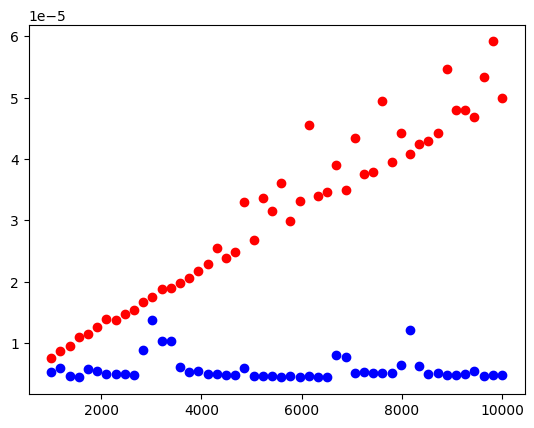

In [30]:
# plot average runtime of `append` for doubling vs. non-doubling strategies,
# as a function of the total number of elements appended

import timeit
import matplotlib.pyplot as plt

ns = np.linspace(1000, 10_000, 50, dtype=int)
ts1 = [timeit.timeit(stmt=f'for _ in range({n}):'
                          f'    lst.append(None, doubling=True)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10) / n
       for n in ns]
ts2 = [timeit.timeit(stmt=f'for _ in range({n}): '
                          f'    lst.append(None, doubling=False)', 
                     setup='lst = ArrayList()',
                     globals=globals(), 
                     number=10) / n
       for n in ns]

plt.plot(ns, ts1, 'ob')
plt.plot(ns, ts2, 'or');

Note how doubling the array size (in blue) gives us a *constant amortized runtime*.

Not doubling the array size (in red) gives us a *linear amortized runtime*! (We won't prove this directly, but can easily observe it.)